In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-alcohol-consumption/student-alcohol-consumption.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/student-alcohol-consumption/student-alcohol-consumption.csv',index_col=0)

In [4]:
df.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


In [5]:
df.isnull().sum()

school        0
sex           0
age           0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
location      0
study_time    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   traveltime  395 non-null    int64 
 8   failures    395 non-null    int64 
 9   schoolsup   395 non-null    object
 10  famsup      395 non-null    object
 11  paid        395 non-null    object
 12  activities  395 non-null    object
 13  nursery     395 non-null    object
 14  higher      395 non-null    object
 15  internet    395 non-null    object
 16  romantic    395 non-null    object
 17  famrel      395 non-null    int64 
 18  freetime    395 non-null    int64 
 19  goout       395 non-null    int64 
 20  Dalc      

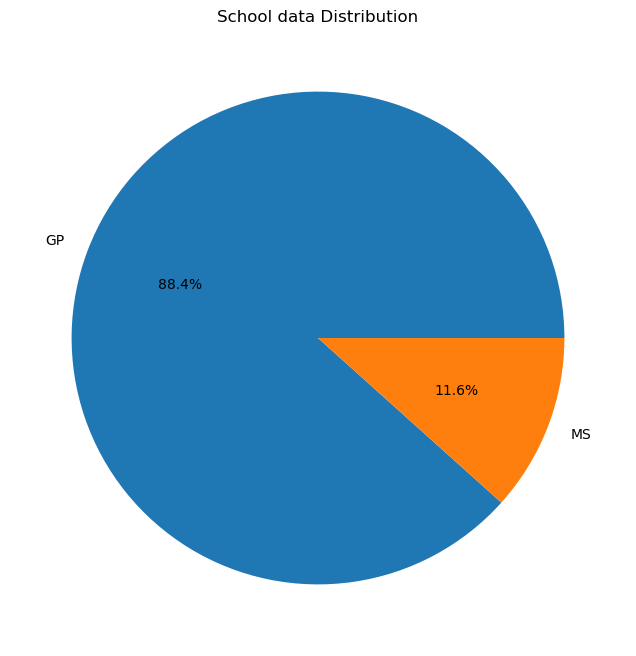

In [7]:
#Count of Student by School
school_data=df['school'].value_counts()
plt.figure(figsize=(8, 8))
plt.title("School data Distribution")
plt.pie(school_data, labels=school_data.index, autopct='%1.1f%%')
plt.show()

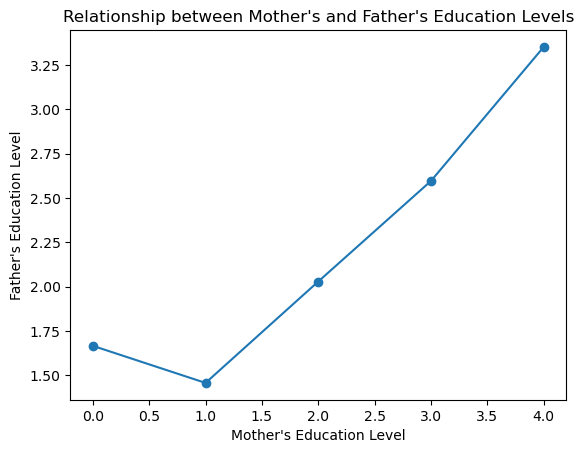

In [8]:
# Group the data by mother's education level and calculate the average father's education level
edu_relationship = df.groupby('Medu')['Fedu'].mean()

# Plot the relationship between mother's and father's education levels
plt.plot(edu_relationship.index, edu_relationship.values, marker='o')
plt.xlabel("Mother's Education Level")
plt.ylabel("Father's Education Level")
plt.title("Relationship between Mother's and Father's Education Levels")
plt.show()


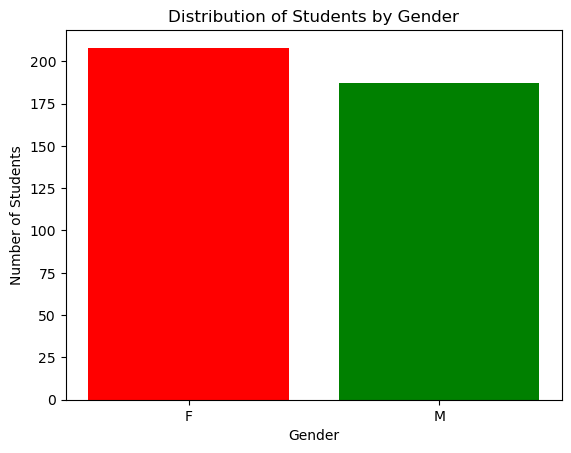

In [9]:
# Count the number of students by gender
gender_counts = df['sex'].value_counts()

# Plot the distribution of students by gender
plt.bar(gender_counts.index, gender_counts.values,color=['red','green'])
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Gender')
plt.show()


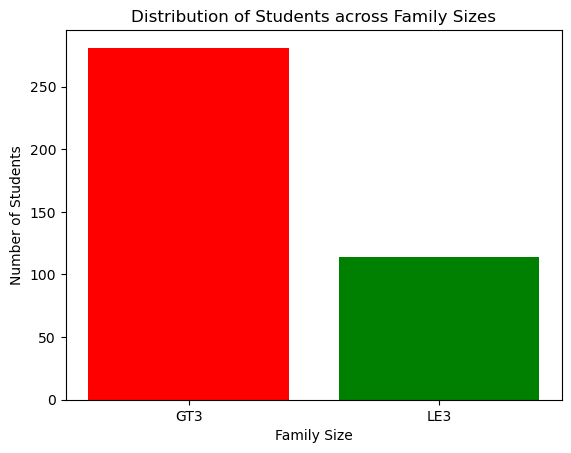

In [10]:
# Count the number of students in each family size category
family_size_counts = df['famsize'].value_counts()

# Plot the distribution of students across family size categories
plt.bar(family_size_counts.index, family_size_counts.values,color=['red','green'])
plt.xlabel('Family Size')
plt.ylabel('Number of Students')
plt.title('Distribution of Students across Family Sizes')
plt.show()


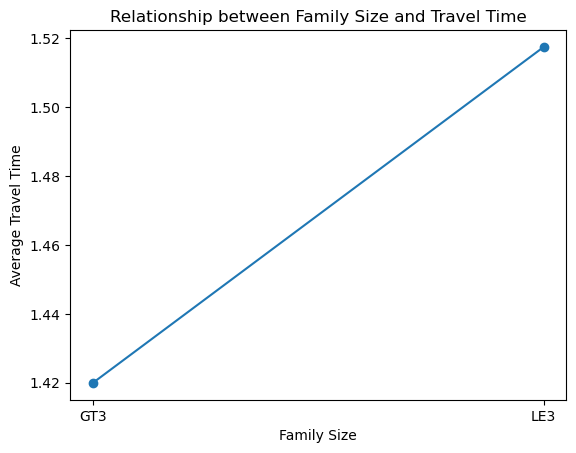

In [11]:
# Calculate the average travel time for each family size category
family_size_travel_time = df.groupby('famsize')['traveltime'].mean()

# Plot the relationship between family size and travel time
plt.plot(family_size_travel_time.index, family_size_travel_time.values, marker='o')
plt.xlabel('Family Size')
plt.ylabel('Average Travel Time')
plt.title('Relationship between Family Size and Travel Time')
plt.show()


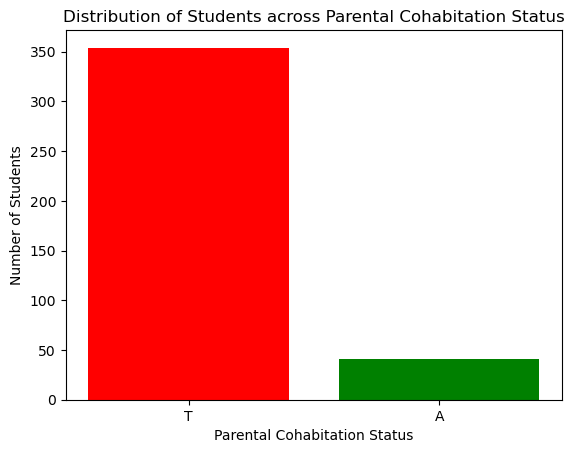

In [12]:
# Count the number of students in each parental cohabitation status category
cohabitation_counts = df['Pstatus'].value_counts()

# Plot the distribution of students across parental cohabitation status categories
plt.bar(cohabitation_counts.index, cohabitation_counts.values,color=['red','green'])
plt.xlabel('Parental Cohabitation Status')
plt.ylabel('Number of Students')
plt.title('Distribution of Students across Parental Cohabitation Status')
plt.show()


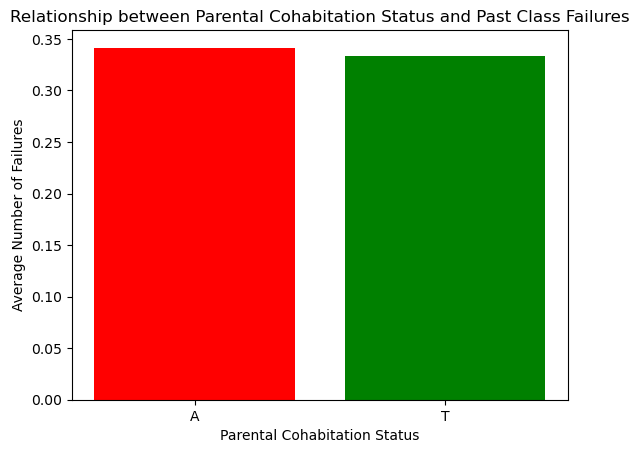

In [13]:
# Calculate the average number of past class failures for each parental cohabitation status
cohabitation_failures = df.groupby('Pstatus')['failures'].mean()

# Plot the relationship between parental cohabitation status and past class failures
plt.bar(cohabitation_failures.index, cohabitation_failures.values,color=['red','green'])
plt.xlabel('Parental Cohabitation Status')
plt.ylabel('Average Number of Failures')
plt.title('Relationship between Parental Cohabitation Status and Past Class Failures')
plt.show()


In [14]:
df

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,LE3,A,2,2,1,2,no,...,4,4,5,4,11,9,9,9,Urban,2 to 5 hours
391,MS,M,17,LE3,T,3,1,2,0,no,...,5,3,4,2,3,14,16,16,Urban,<2 hours
392,MS,M,21,GT3,T,1,1,1,3,no,...,3,3,3,3,3,10,8,7,Rural,<2 hours
393,MS,M,18,LE3,T,3,2,3,0,no,...,1,3,4,5,0,11,12,10,Rural,<2 hours


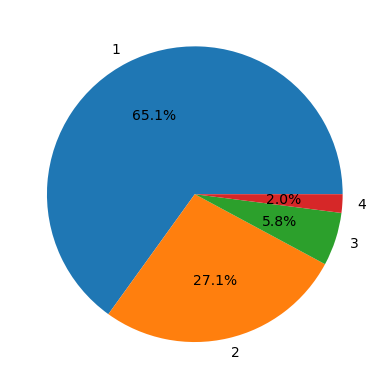

In [15]:
#Travel Time from Home To school For Each Student...
travel_time=df['traveltime'].value_counts()
plt.pie(travel_time,labels=travel_time.index,autopct='%1.1f%%')
plt.show()

In [16]:
# Calculate the correlation coefficient between travel time and past class failures
correlation = df['traveltime'].corr(df['failures'])

print("Correlation coefficient between travel time and past class failures:", correlation)


Correlation coefficient between travel time and past class failures: 0.09223874620951124
